In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import  matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 

sns.set_style('darkgrid')

In [11]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [3]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [8]:
df.label.value_counts()

label
0    38661
1      560
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
paymentMethod_le=LabelEncoder() 
df["paymentMethod"]=paymentMethod_le.fit_transform(df["paymentMethod"])

In [14]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


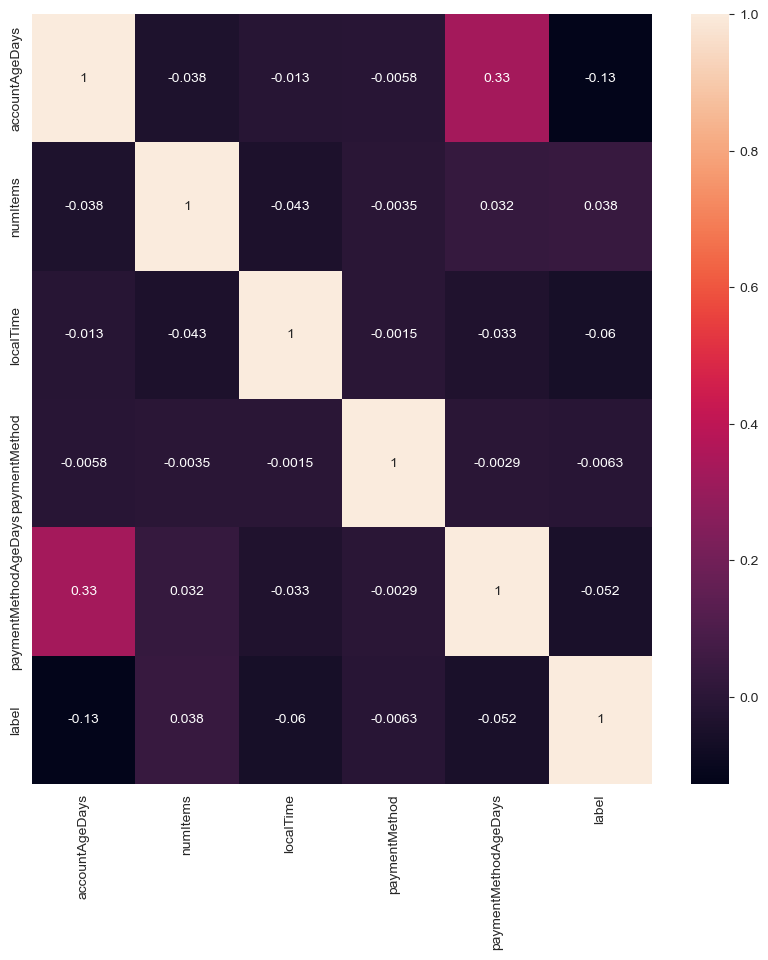

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

In [16]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,0.334795,122.641326,0.014278
std,804.788212,0.566899,0.389360,0.565965,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.000000,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,1.000000,87.510417,0.000000
max,2000.000000,29.000000,5.040929,2.000000,1999.580556,1.000000


In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  int32  
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 1.6 MB


In [27]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29415, 5)
(29415,)
(9806, 5)
(9806,)


In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [36]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg.score(X_train , y_train)*100 , lg.score(X_test,y_test)*100

(98.55855855855856, 98.5519069957169)

In [34]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train , y_train)*100 , lr.score(X_test,y_test)*100

(2.1077367812159964, 2.1724547682273054)

In [40]:
lasso=Lasso(alpha=4)
lasso.fit(X_train,y_train)
lasso.score(X_train , y_train)*100 , lasso.score(X_test,y_test)*100

(0.0, -0.0005126856789772205)

In [42]:
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train , y_train)*100 , dt.score(X_test,y_test)*100

(100.0, 100.0)

In [43]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train , y_train)*100 , rf.score(X_test,y_test)*100

(100.0, 100.0)

In [44]:
pred = lg.predict(X_test)

----------------------------------------------------Accuracy------------------------------------------------------
0.9855190699571691

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9664
           1       0.00      0.00      0.00       142

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806


-------------------------------------------------Confustion Metrics----------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


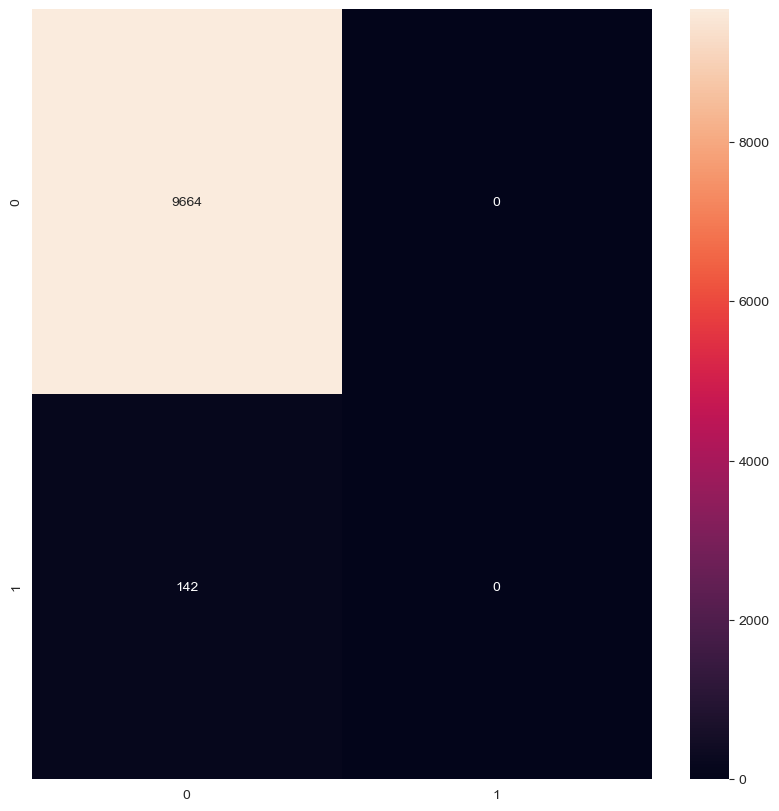

In [45]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');